# Import the library

This Section contains the necessary library that would be used for analysis in this research

In [1]:
# general imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#preprocessing
import calendar
# import emoji
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#Naive Bayes classifier process
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# rnn
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding, Dropout,Activation,LSTM
from tensorflow.keras.layers import TextVectorization


#transformers
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers import BertTokenizerFast
from transformers import AutoTokenizer,BertTokenizer
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel


#sentiment extraction
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\718449\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\718449\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\718449\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\718449\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\718449\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# reads in the data using pandas dataframe 
covid_tweets=pd.read_csv('vaccination_tweet.csv')

In [3]:
covid_tweets.shape # inspecting the data

(48000, 16)

In [4]:
covid_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                48000 non-null  int64 
 1   user_name         48000 non-null  object
 2   user_location     37066 non-null  object
 3   user_description  44816 non-null  object
 4   user_created      48000 non-null  object
 5   user_followers    48000 non-null  int64 
 6   user_friends      48000 non-null  int64 
 7   user_favourites   48000 non-null  int64 
 8   user_verified     48000 non-null  bool  
 9   date              48000 non-null  object
 10  text              48000 non-null  object
 11  hashtags          37743 non-null  object
 12  source            47887 non-null  object
 13  retweets          48000 non-null  int64 
 14  favorites         48000 non-null  int64 
 15  is_retweet        48000 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 5.2+ MB


In [5]:
covid_tweets=covid_tweets.dropna()  #drop nan values
covid_tweets

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47976,1380950299666309122,Bahrmn,"header: movie, Godzilla: KOM",Analyst. Fan of Butterfly Effect. Teach me & m...,2018-10-13 01:51:31,362,275,28838,False,2021-04-10 18:26:22,Official in charge of acquiring vaccine:\n\n'#...,"['US', 'Iran']",Twitter for Android,0,2,False
47977,1380949871004278785,Charlemagne,"California, United States","Electronic music producer, composer, and DJ. L...",2011-09-28 23:28:47,231,1684,24453,False,2021-04-10 18:24:40,First vaccine dosage (Moderna) down! One more ...,['Moderna'],Twitter for iPhone,0,4,False
47978,1380947890122620930,🇺🇸 James Madison Key 🇺🇸,"63.1650° N, 50.7379° W",Time traveller. I block the hateful & the bor...,2013-03-22 04:18:12,1972,2889,51857,False,2021-04-10 18:16:48,At @Nike and just got #Moderna number 2. #va...,"['Moderna', 'vaccinated']",Twitter for Android,0,0,False
47985,1380945184972812299,"Sean C. Lucan, MD","Bronx, NY","Evidence over ideology, reason over irrational...",2012-06-05 13:48:27,1539,751,1115,False,2021-04-10 18:06:03,#Moderna #vaccine overall provides greater pro...,"['Moderna', 'vaccine', 'B1351', 'infection']",Buffer,1,0,False


we can see that from the data has 28092 rows and 16 columns, now lets inspect the data records using the info method in order to have more insight into the data.

In [6]:
#extract the months and years from the data column to aid further analysis
covid_tweets['year'] = pd.to_datetime(covid_tweets['date']).dt.year

covid_tweets['month'] = pd.to_datetime(covid_tweets['date']).dt.month

covid_tweets['month'] = covid_tweets['month'].apply(lambda x: calendar.month_abbr[x]) 
covid_tweets=covid_tweets.drop(['date'],axis=1)

In [7]:
covid_tweets.head(20) # inspects the head 

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,year,month
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,Dec
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,Dec
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020,Dec
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,2020,Dec
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,2020,Dec
15,1337789467038523394,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter for iPhone,0,1,False,2020,Dec
16,1337789191598575616,STOPCOMMONPASS.ORG,Global,'Trust' is not carte-blanche for erosion of ou...,2020-10-25 20:33:33,406,176,479,False,UPDATED: #YellowFever &amp; #COVID19 #Immunity...,"['YellowFever', 'COVID19', 'ImmunityPassports'...",Twitter Web App,2,2,False,2020,Dec
17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False,2020,Dec
18,1337781178665816064,Braderz73🌹#GTTO 🇪🇺 🇬🇧,"Bristol, UK","One of those lefty types, I believe in a faire...",2012-07-24 08:18:51,6430,6292,45007,False,.@Pfizer will rake in billions from its expens...,['CovidVaccine'],Twitter for Android,3,3,False,2020,Dec
19,1337776763384958976,Alex Vie,"Los Angeles, CA",Marine vet. Yogi. Krav Maga. Runner. Climber. ...,2010-01-24 04:43:57,125,442,5401,False,The trump administration failed to deliver on ...,"['COVIDIOTS', 'coronavirus', 'CovidVaccine']",Twitter for iPhone,0,0,False,2020,Dec


# Text Preprocessing

In [8]:
#regular expression(re) technique will bw used to clean the text
def preprocess_text(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               "]+", flags=re.UNICODE)
#      Replace emojis with empty string
    text=emoji_pattern.sub(r'', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize words
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    #lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text

In [9]:
covid_tweets['text']=covid_tweets['text'].apply(preprocess_text) #apply functio to text data

In [10]:
covid_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet,year,month
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,folk said daikon paste could treat cytokine st...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,Dec
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,Dec
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,bit sad claim fame success vaccination patriot...,['vaccination'],Twitter Web App,0,4,False,2020,Dec
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,covidvaccine state start getting covidvaccine ...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,2020,Dec
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,death closing mark million people wait pfizerb...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,2020,Dec


# Labelling 


In [11]:
# Define function to get value counts
def get_value_counts(col_name, analyzer_name): 
    count = pd.DataFrame(covid_tweets[col_name].value_counts())
    percentage = pd.DataFrame(covid_tweets[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
   
    return value_counts_df

In [12]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
covid_tweets['Polarity_score'] = covid_tweets['text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
covid_tweets['Polarity_cmp_score'] = covid_tweets['Polarity_score'].apply(lambda score_dict: score_dict['compound'])
neutral_thresh = 0.05
# Categorize scores into the sentiments of positive, neutral or negative
covid_tweets['Sentiment'] = covid_tweets['Polarity_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

covid_tweets['Polarity_cmp_score'].describe()

count    28092.000000
mean         0.105837
std          0.341422
min         -0.944200
25%          0.000000
50%          0.000000
75%          0.381800
max          0.959500
Name: Polarity_cmp_score, dtype: float64

In [13]:
sentiment_df = get_value_counts('Sentiment','NLTK Vader')
sentiment_df

,sentiment,counts,percentage
0,Negative,4483,15.96
1,Neutral,13224,47.07
2,Positive,10385,36.97


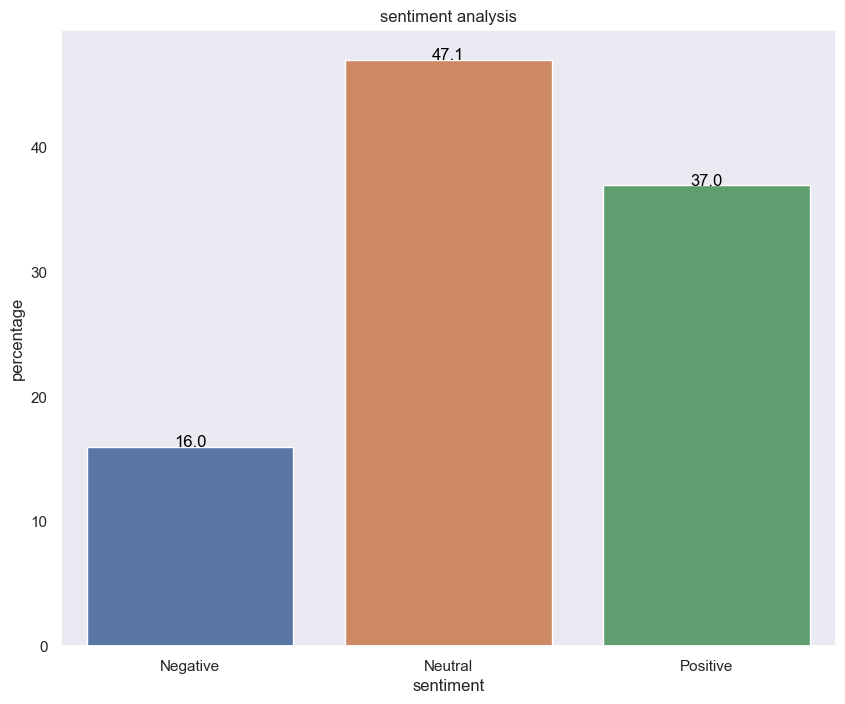

In [14]:
sns.set_theme(style="dark")
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="sentiment", y="percentage", data=sentiment_df)
ax.set_title('sentiment analysis')

for index, row in sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

# Exploratory data analysis of covid tweets

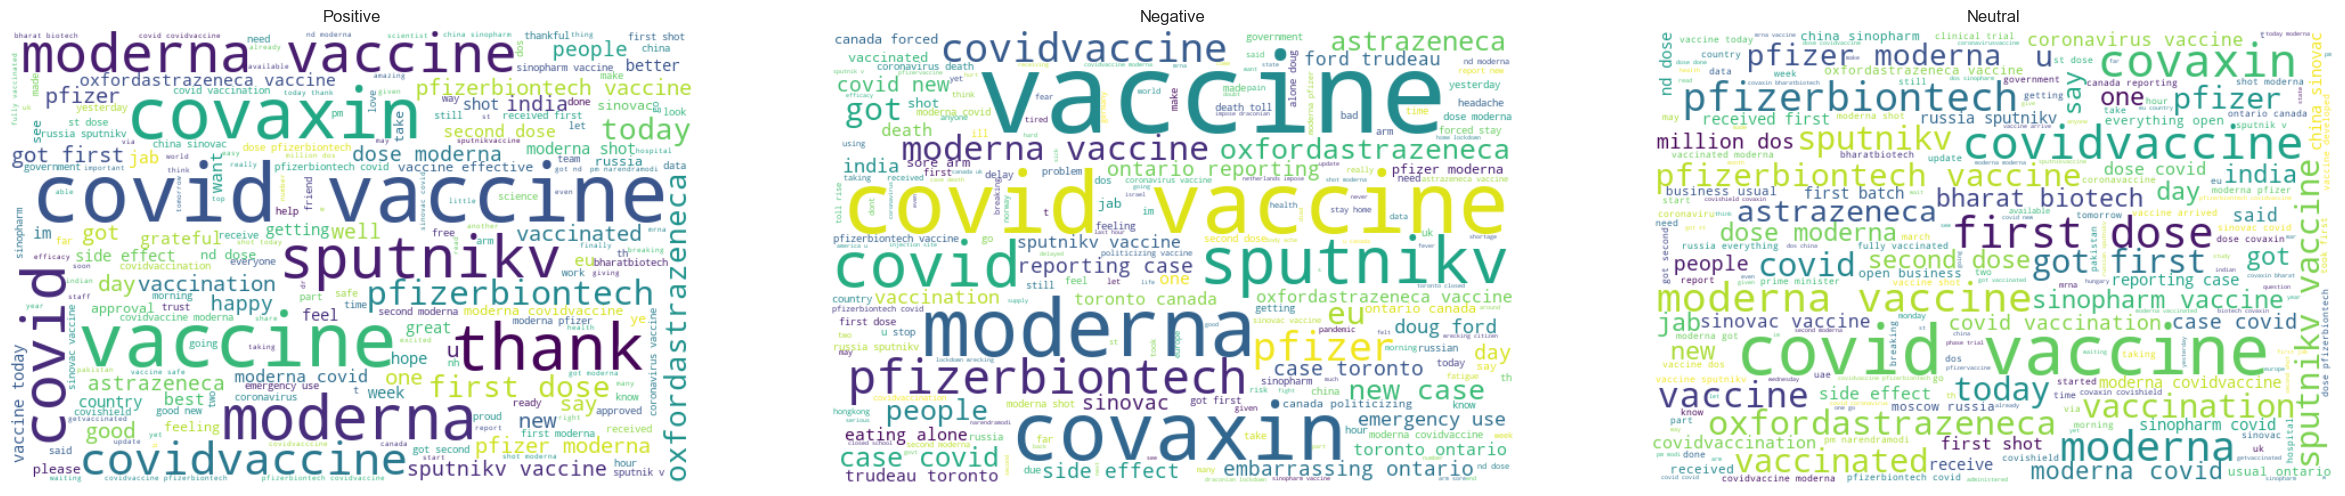

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(['amp', 'https', 'co', 'rt'])

# Define the positive, negative and neutral sentiments
positive_sentiment = covid_tweets[covid_tweets['Sentiment'] == 'Positive']['text'].tolist()
negative_sentiment = covid_tweets[covid_tweets['Sentiment'] == 'Negative']['text'].tolist()
neutral_sentiment = covid_tweets[covid_tweets['Sentiment'] == 'Neutral']['text'].tolist()

# Generate the word clouds for each sentiment
wc_positive = WordCloud(background_color='white', stopwords=stopwords, width=600, height=400).generate(' '.join(positive_sentiment))
wc_negative = WordCloud(background_color='white', stopwords=stopwords, width=600, height=400).generate(' '.join(negative_sentiment ))
wc_neutral = WordCloud(background_color='white', stopwords=stopwords, width=600, height=400).generate(' '.join(neutral_sentiment))

# Plot the word clouds

fig, axs = plt.subplots(1, 3, figsize=(30, 6))
axs[0].imshow(wc_positive, interpolation='bilinear')
axs[0].set_title('Positive')
axs[0].axis('off')
axs[1].imshow(wc_negative, interpolation='bilinear')
axs[1].set_title('Negative')
axs[1].axis('off')
axs[2].imshow(wc_neutral, interpolation='bilinear')
axs[2].set_title('Neutral')
axs[2].axis('off')
plt.show()

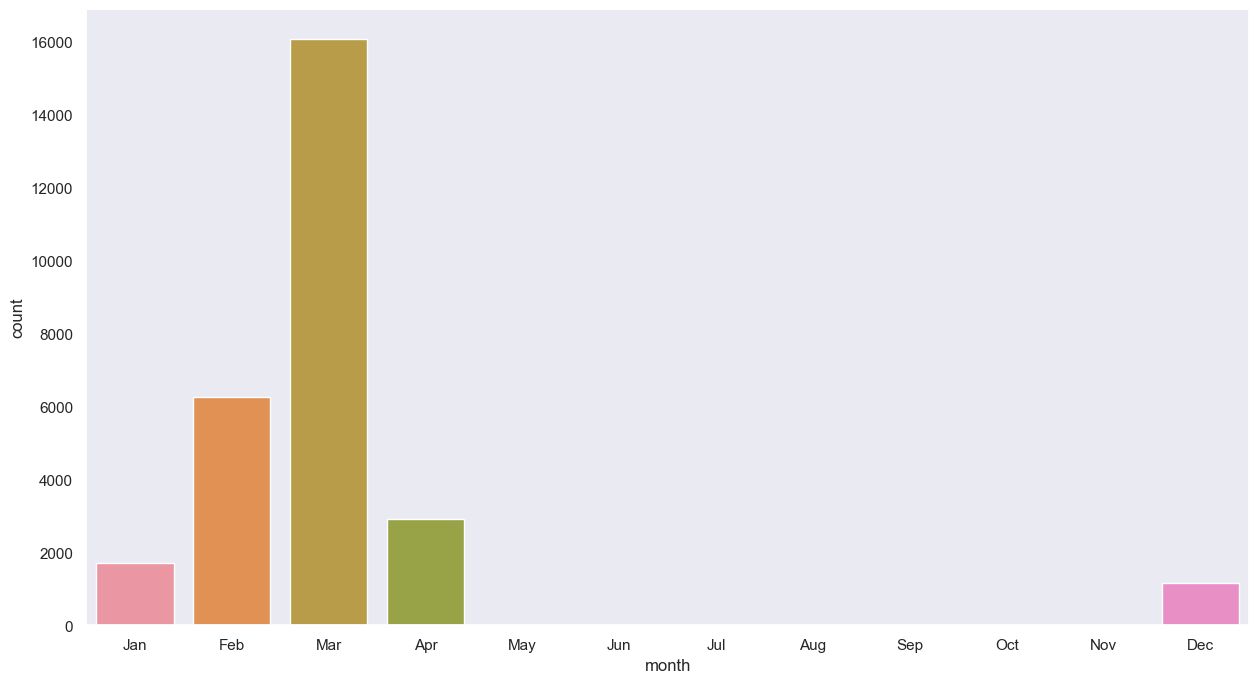

In [16]:
#tweets relating to sentiments on covid vaccine
plt.figure(figsize=(15, 8))
sns.countplot(x=covid_tweets['month'],data=covid_tweets,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

From the above diagram we will notice that, from january till March, there is a gradual increase in the tweets, which in March has the highest amount , but after this there was a decrease in tweets,from april to jun,then there were no twees till the end of the last fourth quarter December

We will also have a look at the retweets over the years , an exploratory data analysis tool is used to perform this and it is called dtale library

<AxesSubplot:xlabel='year', ylabel='retweets'>

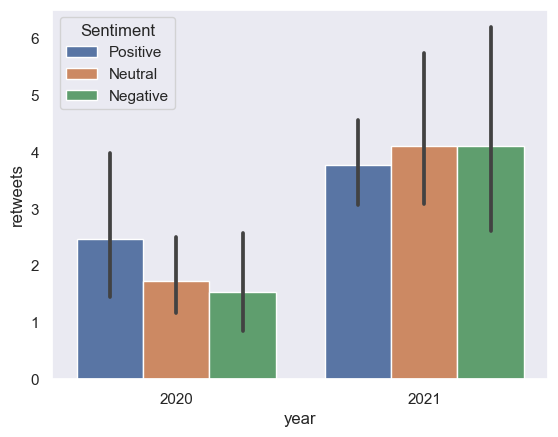

In [17]:
# plot of the retweets of positive and negative sentiments yearly
sns.barplot(x='year',y='retweets',data=covid_tweets,hue='Sentiment')


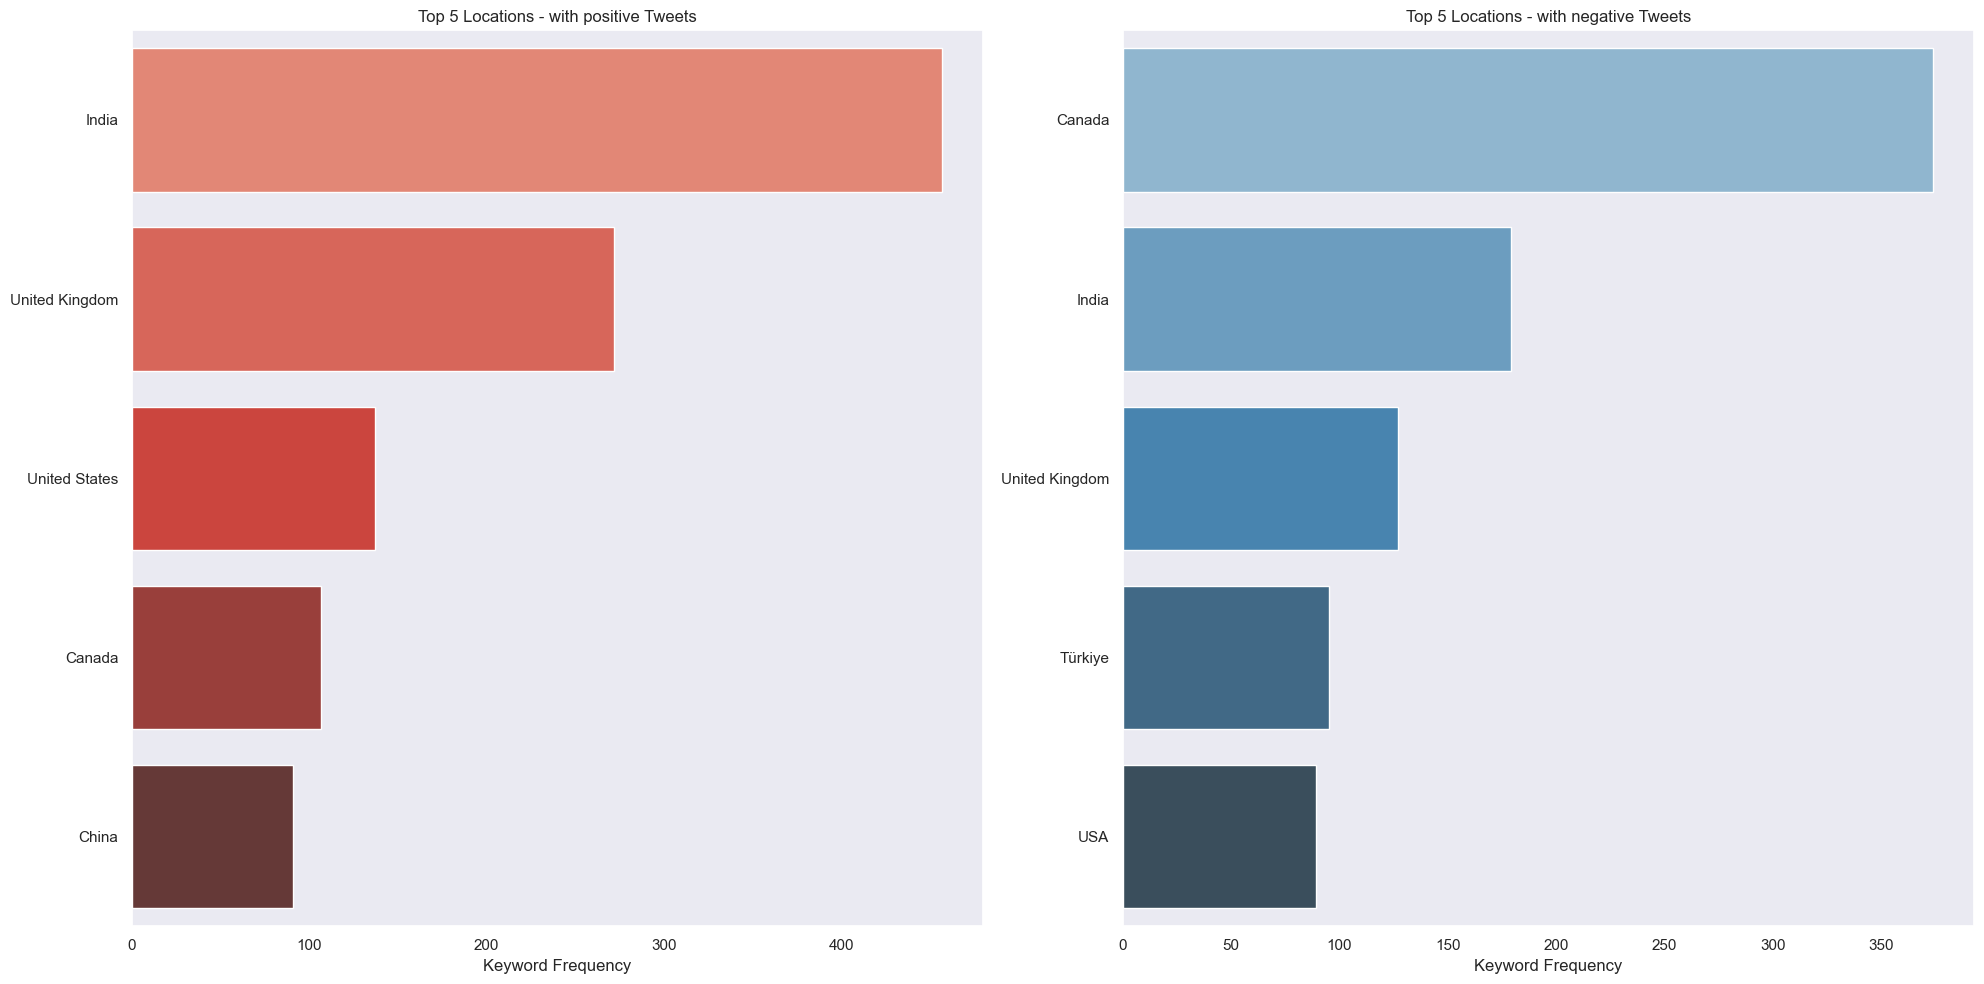

In [70]:
# location of users whose tweets have positive and negative sentiments
covid_tweets=covid_tweets.replace({'user_location':{'New Delhi, India':'India'}})
covid_tweets=covid_tweets.replace({'user_location':{'Toronto, Canada  and Worldwide':'Canada'}})
covid_tweets=covid_tweets.replace({'user_location':{'London, England':'United Kingdom'}})
covid_tweets=covid_tweets.replace({'user_location':{'Beijing, China':'China'}})


positive_loc = covid_tweets.loc[covid_tweets["Sentiment"] == 'Positive']["user_location"].value_counts()
negative_loc = covid_tweets.loc[covid_tweets["Sentiment"] == 'Negative']["user_location"].value_counts()


# plots the top 5 location with positive and negative tweets 
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.barplot(y=positive_loc [0:5].index, x=positive_loc [0:5], orient='h', ax=ax[0], palette="Reds_d")
sns.barplot(y=negative_loc[0:5].index, x=negative_loc[0:5], orient='h', ax=ax[1], palette="Blues_d")


# shows the label title of the plot of positive and negative
ax[0].set_title("Top 5 Locations - with positive Tweets")
ax[0].set_xlabel("Keyword Frequency")
# shows the label title of the plot

ax[1].set_title("Top 5 Locations - with negative Tweets")
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()


# displays the graph
plt.show()

# Data balancing using RandomOverSampler

In [14]:
ros = RandomOverSampler()   #instantiate 
x, y = ros.fit_resample(np.array(covid_tweets['text']).reshape(-1, 1), np.array(covid_tweets['Sentiment']).reshape(-1, 1));



#create a dataframe for the newly balanced data
Tweet__sentiment = pd.DataFrame(list(zip([x[0] for x in x], y)), columns = ['text', 'Sentiment']);

In [15]:
Tweet__sentiment.shape

(39672, 2)

# Label encoding for baseline classifier

In [16]:
Tweet__sentiment['Sentiment'] = Tweet__sentiment['Sentiment'].map({'Negative':0,'Neutral':1,'Positive':2})

# Splitting Data into train,val and test

In [17]:
X = Tweet__sentiment['text'].values
y = Tweet__sentiment['Sentiment'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split to train and test

X , y = X_train, y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #split train further to val and train

Let us create a copy of our split data that has been encoded using label 

In [19]:
y_train_le = y_train.copy()
y_valid_le = y_val.copy()
y_test_le = y_test.copy()

# Encode y(sentiment)

In [20]:
#using one hot encoder

ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [20]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_val.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 25389
VALIDATION DATA: 6348
TESTING DATA: 7935


# Basic Classifier:  Naive Bayes 

In [27]:
#we will use countvectorizer to convert text to matrix
clf = CountVectorizer()  
X_train_cv =  clf.fit_transform(X_train)
X_val_cv =clf.transform(X_val)
X_test_cv = clf.transform(X_test)

In [29]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv) #to give a more informative(importance) representation text
X_train_tf = tf_transformer.transform(X_train_cv)
X_val_tf =tf_transformer.transform(X_val_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [30]:
nb_clf = MultinomialNB()  #naives bayes classifier for text
nb_clf.fit(X_train_tf, y_train_le)
val_pred = nb_clf.predict(X_val_tf)
nb_pred = nb_clf.predict(X_test_tf)



#getting validation accuracy
val_acc = accuracy_score(y_valid_le, val_pred)
print('Validation accuracy:', val_acc)

Validation accuracy: 0.8356962822936358


In [32]:
#evaluating the model
print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.80      0.90      0.85      2652
     Neutral       0.87      0.74      0.80      2587
    Positive       0.81      0.84      0.83      2696

    accuracy                           0.83      7935
   macro avg       0.83      0.82      0.82      7935
weighted avg       0.83      0.83      0.82      7935



In [33]:
#function for confusion matrix
def confusion_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Reds", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

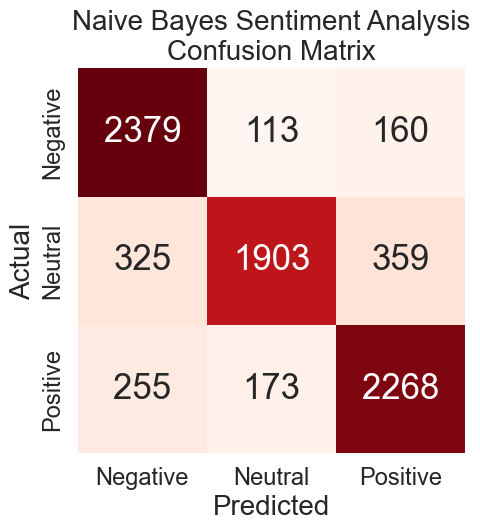

In [34]:
confusion_matrix(y_test_le, nb_pred,'Naive Bayes Sentiment Analysis\nConfusion Matrix')

# RNN Classification

In [41]:
# Define some hyperparameters
max_words = 10000 # Maximum number of words to include in the tokenizer
max_len = 200 # Maximum length of each input sequence
embedding_dim = 100 # Dimensionality 
num_classes = 3 # Number of output classes


# Preprocess the text data
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train) #converts text to integers
train_data = pad_sequences(train_sequences, maxlen=max_len)

val_sequences = tokenizer.texts_to_sequences(X_val)
val_data = pad_sequences(val_sequences, maxlen=max_len)  #pad sequences to max len

test_sequences = tokenizer.texts_to_sequences(X_test)
test_data = pad_sequences(test_sequences, maxlen=max_len)

In [36]:
# Define the RNN model architecture

model = Sequential()  

model.add(Embedding(max_words, embedding_dim, input_length=max_len))

model.add(Dropout(0.4))

model.add(LSTM(64, return_sequences=True))  # Add another LSTM layer with return_sequences=True

model.add(LSTM(32))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['CategoricalAccuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 200, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 200, 64)           42240     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 1,054,755
Trainable params: 1,054,755
Non-trainable params: 0
_________________________________________________________________


In [38]:
RNN_model=model.fit(train_data, y_train, validation_data=(val_data, y_valid), epochs=5, batch_size=32)

Epoch 1/5
794/794 [==============================] - 18s 17ms/step - loss: 0.4981 - categorical_accuracy: 0.7955 - val_loss: 0.2733 - val_categorical_accuracy: 0.9135
Epoch 2/5
794/794 [==============================] - 13s 16ms/step - loss: 0.1426 - categorical_accuracy: 0.9589 - val_loss: 0.1826 - val_categorical_accuracy: 0.9483
Epoch 3/5
794/794 [==============================] - 13s 16ms/step - loss: 0.0896 - categorical_accuracy: 0.9764 - val_loss: 0.1773 - val_categorical_accuracy: 0.9532
Epoch 4/5
794/794 [==============================] - 13s 16ms/step - loss: 0.0718 - categorical_accuracy: 0.9802 - val_loss: 0.1952 - val_categorical_accuracy: 0.9515
Epoch 5/5
794/794 [==============================] - 13s 16ms/step - loss: 0.0605 - categorical_accuracy: 0.9837 - val_loss: 0.1929 - val_categorical_accuracy: 0.9535


In [39]:
result_RNN = model.predict(test_data)  #using new data, test data to check our model

248/248 [==============================] - 2s 6ms/step


In [40]:
y_pred=  np.zeros_like(result_RNN)
y_pred[np.arange(len(y_pred)), result_RNN.argmax(1)] = 1

In [41]:
print('\tClassification Report for RNN:\n\n',classification_report(y_test,y_pred , target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RNN:

               precision    recall  f1-score   support

    Negative       0.95      0.96      0.96      2652
     Neutral       0.95      0.95      0.95      2587
    Positive       0.95      0.95      0.95      2696

   micro avg       0.95      0.95      0.95      7935
   macro avg       0.95      0.95      0.95      7935
weighted avg       0.95      0.95      0.95      7935
 samples avg       0.95      0.95      0.95      7935



In [42]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Reds", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

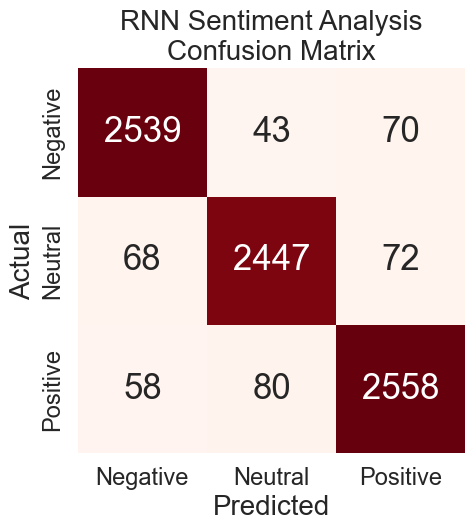

In [43]:
conf_matrix(y_test.argmax(1), y_pred.argmax(1),'RNN Sentiment Analysis\nConfusion Matrix')

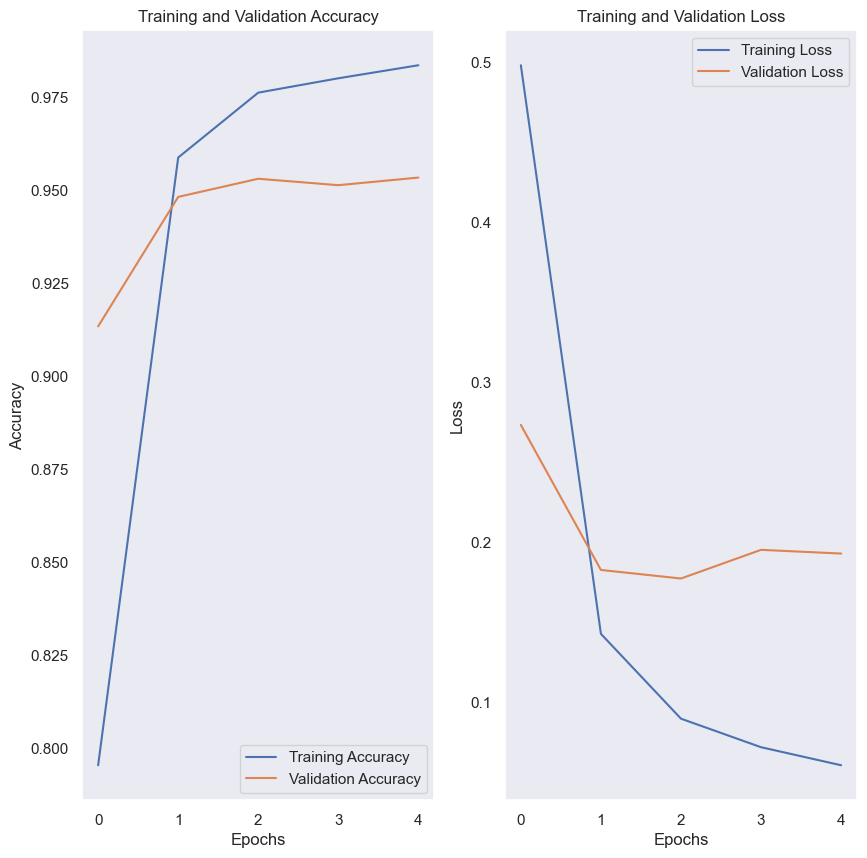

In [45]:
acc = RNN_model.history['categorical_accuracy'] # training accuracy
val_acc = RNN_model.history['val_categorical_accuracy'] # validation accuracy

loss = RNN_model.history['loss'] # training loss
val_loss = RNN_model.history['val_loss'] # validation loss

epochs_range = range(5)



plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# RNN + GloVe

In [45]:
#tokenize inputs
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

#file path to embedding vectors size 200 dimensions
glove_dir = "//adir.hull.ac.uk/home/718/718449/Downloads/glove.6B.200d.txt" 
embeddings_index = {}   #extract embeddibgs from GloVe
with open(glove_dir, encoding='utf8') as f:
    for line in f:
        values = line.split()
        if len(values) < 2:
            continue
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
#create embedding matrix
embedding_dim = 200
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [46]:
#compile model
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False))

model.add(LSTM(128, dropout=0.2, return_sequences=True))

model.add(LSTM(64, dropout=0.2))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['CategoricalAccuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 200)         4765000   
                                                                 
 lstm_12 (LSTM)              (None, None, 128)         168448    
                                                                 
 lstm_13 (LSTM)              (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,983,051
Trainable params: 218,051
Non-trainable params: 4,765,000
_________________________________________________________________


In [47]:
#train model
RNN_model_GloVe=model.fit(train_data, y_train, validation_data=(val_data, y_valid), epochs=5, batch_size=32)

Epoch 1/5
794/794 [==============================] - 14s 17ms/step - loss: 0.6292 - categorical_accuracy: 0.7343 - val_loss: 0.4937 - val_categorical_accuracy: 0.8086
Epoch 2/5
794/794 [==============================] - 12s 16ms/step - loss: 0.4384 - categorical_accuracy: 0.8310 - val_loss: 0.3598 - val_categorical_accuracy: 0.8681
Epoch 3/5
794/794 [==============================] - 12s 15ms/step - loss: 0.3395 - categorical_accuracy: 0.8743 - val_loss: 0.2858 - val_categorical_accuracy: 0.9004
Epoch 4/5
794/794 [==============================] - 12s 15ms/step - loss: 0.2696 - categorical_accuracy: 0.9054 - val_loss: 0.2539 - val_categorical_accuracy: 0.9164
Epoch 5/5
794/794 [==============================] - 12s 15ms/step - loss: 0.2164 - categorical_accuracy: 0.9255 - val_loss: 0.2305 - val_categorical_accuracy: 0.9252


In [48]:
result_RNN_model_GloVe = model.predict(test_data)

248/248 [==============================] - 2s 7ms/step


In [50]:
y_pred_glove=  np.zeros_like(result_RNN_model_GloVe)
y_pred_glove[np.arange(len(y_pred_glove)), result_RNN_model_GloVe.argmax(1)] = 1

In [51]:
print('\tClassification Report for RNN:\n\n',classification_report(y_test,y_pred_glove , target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RNN:

               precision    recall  f1-score   support

    Negative       0.94      0.91      0.93      2652
     Neutral       0.90      0.93      0.92      2587
    Positive       0.91      0.92      0.91      2696

   micro avg       0.92      0.92      0.92      7935
   macro avg       0.92      0.92      0.92      7935
weighted avg       0.92      0.92      0.92      7935
 samples avg       0.92      0.92      0.92      7935



# BERT Classification

In [46]:
#custom tokenizer function and call the encode_plus method of the BERT tokenizer.

MAX_LEN=128
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            truncation=True,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [47]:
#apply the tokenizer function to the train, validation and test sets
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_val, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [48]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')  #import the BERT model from the pretrained library

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [49]:
'''create a custom function to host the pre trained BERT model, and attach to it 
a 3 neurons output layer, necessary to perform the classification of the 3 different classes of the dataset 
(the 3 emotions)'''

def create_model(bert_model, max_len=MAX_LEN):
    
    #parameters
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    x = tf.keras.layers.Dense(128, activation="relu")(embeddings)
    
    xx = keras.layers.Dropout(0.4)(x)
    
    output = tf.keras.layers.Dense(3, activation="softmax")(xx)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [50]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [51]:
#fine tuning the BERT transformer
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=5, batch_size=32)

Epoch 1/5
794/794 [==============================] - 191s 231ms/step - loss: 0.5345 - categorical_accuracy: 0.7851 - val_loss: 0.2617 - val_categorical_accuracy: 0.9152
Epoch 2/5
794/794 [==============================] - 182s 229ms/step - loss: 0.2168 - categorical_accuracy: 0.9341 - val_loss: 0.1655 - val_categorical_accuracy: 0.9497
Epoch 3/5
794/794 [==============================] - 182s 229ms/step - loss: 0.1255 - categorical_accuracy: 0.9634 - val_loss: 0.1596 - val_categorical_accuracy: 0.9551
Epoch 4/5
794/794 [==============================] - 181s 228ms/step - loss: 0.0739 - categorical_accuracy: 0.9788 - val_loss: 0.1265 - val_categorical_accuracy: 0.9693
Epoch 5/5
794/794 [==============================] - 181s 229ms/step - loss: 0.0508 - categorical_accuracy: 0.9858 - val_loss: 0.1079 - val_categorical_accuracy: 0.9709


In [52]:
result_bert = model.predict([test_input_ids,test_attention_masks])

248/248 [==============================] - 19s 73ms/step


In [53]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

Bert Results

In [54]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Reds", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

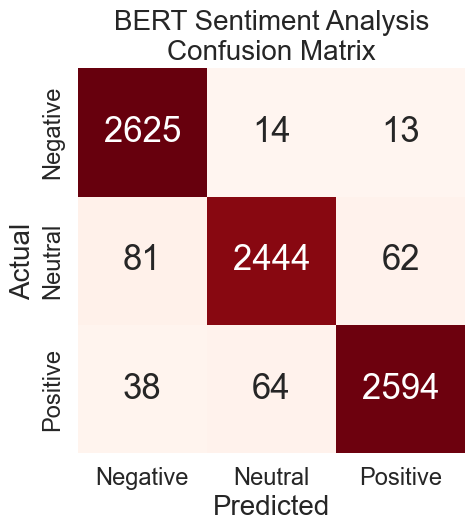

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.96      0.99      0.97      2652
     Neutral       0.97      0.94      0.96      2587
    Positive       0.97      0.96      0.97      2696

   micro avg       0.97      0.97      0.97      7935
   macro avg       0.97      0.97      0.97      7935
weighted avg       0.97      0.97      0.97      7935
 samples avg       0.97      0.97      0.97      7935



In [55]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

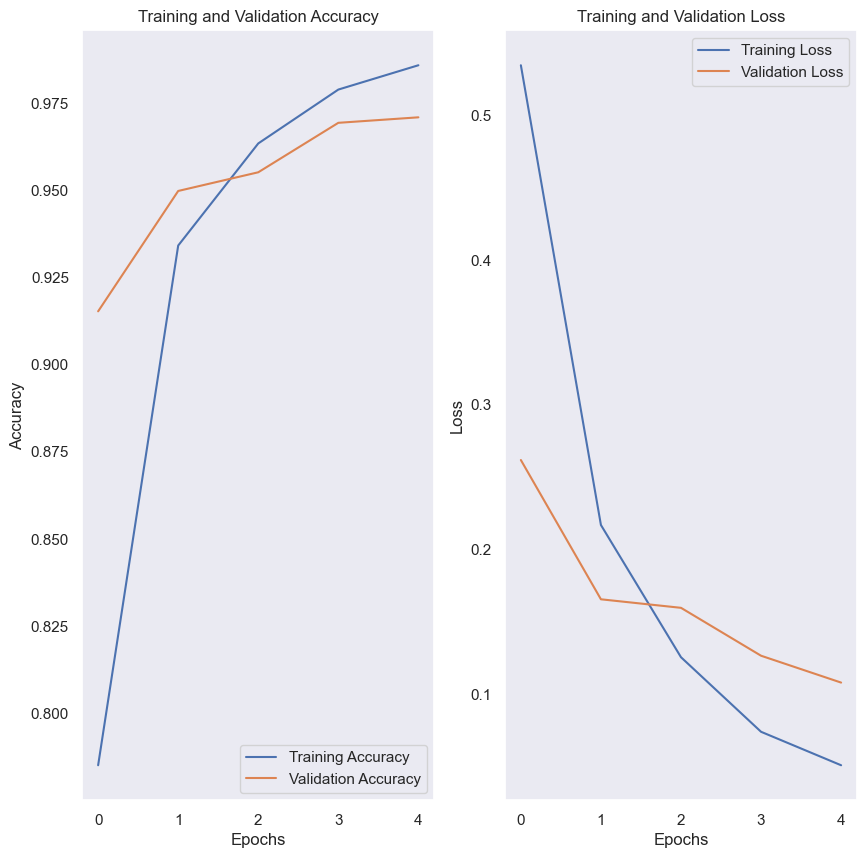

In [56]:
acc = history_bert.history['categorical_accuracy'] # training accuracy
val_acc = history_bert.history['val_categorical_accuracy'] # validation accuracy

loss = history_bert.history['loss'] # training loss
val_loss = history_bert.history['val_loss'] # validation loss

epochs_range = range(5)



plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# RoBERTa Classification

In [21]:
##import the tokenizer used to train the original roberta transformer 
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

In [24]:
MAX_LEN=128
# def tokenize_roberta(data,max_len=MAX_LEN) :
#     input_ids = []
#     attention_masks = []
#     for i in range(len(data)):
#         encoded = tokenizer_roberta.encode_plus(
#             data[i],
#             add_special_tokens=True,
#             max_length=max_len,
#             truncation= True,
#             padding='max_length',
#             return_attention_mask=True
#         )
#         input_ids.append(encoded['input_ids'])
#         attention_masks.append(encoded['attention_mask'])
#     return np.array(input_ids),np.array(attention_masks)

#define the tokenization function
def tokenize_roberta(data,max_len):
    input_ids=[]
    attention_masks=[]
    
    for i in range(len(data)):
        encode_data=tokenizer_roberta.encode_plus(data[i],add_special_tokens=True,max_length=max_len,truncation=True,pad_to_max_length=True,return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)
        

In [25]:
#apply the tokenizer function to the train, validation and test set

train_input_ids, train_attention_masks = tokenize_roberta(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(X_val, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(X_test, MAX_LEN)

In [60]:
'''create a custom function to host the pre trained RoBERTa model, and attach to it 
a 3 neurons output layer, necessary to perform the classification of the 3 different classes of the dataset 
(the 3 emotions)'''
def create_model(bert_model, max_len=MAX_LEN):
    
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    x = tf.keras.layers.Dense(128, activation='relu')(embeddings)
    
    xx = keras.layers.Dropout(0.4)(x)
    
    output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(xx)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    return model

In [61]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')  #import the RoBERTa model from the pretrained library

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [62]:
model = create_model(roberta_model, MAX_LEN)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_3[0][0]',                
 el)                            thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [63]:
# y_train=np.array(y_train)
# y_valid=np.array(y_val)

In [64]:

history_2 = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=5, batch_size=30)

Epoch 1/5
847/847 [==============================] - 198s 226ms/step - loss: 0.5120 - categorical_accuracy: 0.8000 - val_loss: 0.2687 - val_categorical_accuracy: 0.9094
Epoch 2/5
847/847 [==============================] - 189s 224ms/step - loss: 0.2531 - categorical_accuracy: 0.9170 - val_loss: 0.2029 - val_categorical_accuracy: 0.9321
Epoch 3/5
847/847 [==============================] - 190s 224ms/step - loss: 0.1664 - categorical_accuracy: 0.9479 - val_loss: 0.1507 - val_categorical_accuracy: 0.9538
Epoch 4/5
847/847 [==============================] - 190s 224ms/step - loss: 0.1183 - categorical_accuracy: 0.9645 - val_loss: 0.1446 - val_categorical_accuracy: 0.9576
Epoch 5/5
847/847 [==============================] - 190s 224ms/step - loss: 0.0873 - categorical_accuracy: 0.9735 - val_loss: 0.1175 - val_categorical_accuracy: 0.9675


In [65]:
result_roberta = model.predict([test_input_ids, test_attention_masks])

248/248 [==============================] - 20s 74ms/step


In [66]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

Roberta results

In [67]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Reds", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

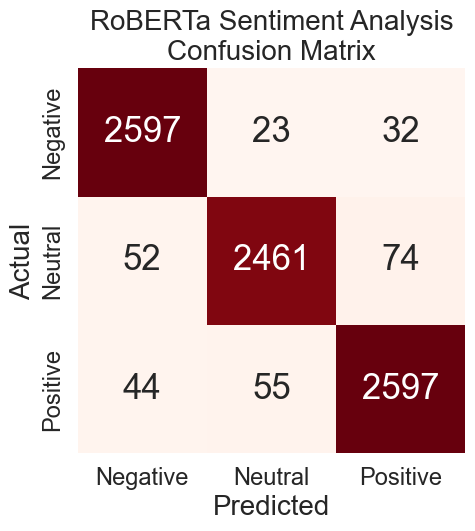

	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.96      0.98      0.97      2652
     Neutral       0.97      0.95      0.96      2587
    Positive       0.96      0.96      0.96      2696

   micro avg       0.96      0.96      0.96      7935
   macro avg       0.96      0.96      0.96      7935
weighted avg       0.96      0.96      0.96      7935
 samples avg       0.96      0.96      0.96      7935



In [68]:
conf_matrix(y_test.argmax(1),y_pred_roberta.argmax(1),'RoBERTa Sentiment Analysis\nConfusion Matrix')
print('\tClassification Report for RoBERTa:\n\n',classification_report(y_test,y_pred_roberta, target_names=['Negative', 'Neutral', 'Positive']))

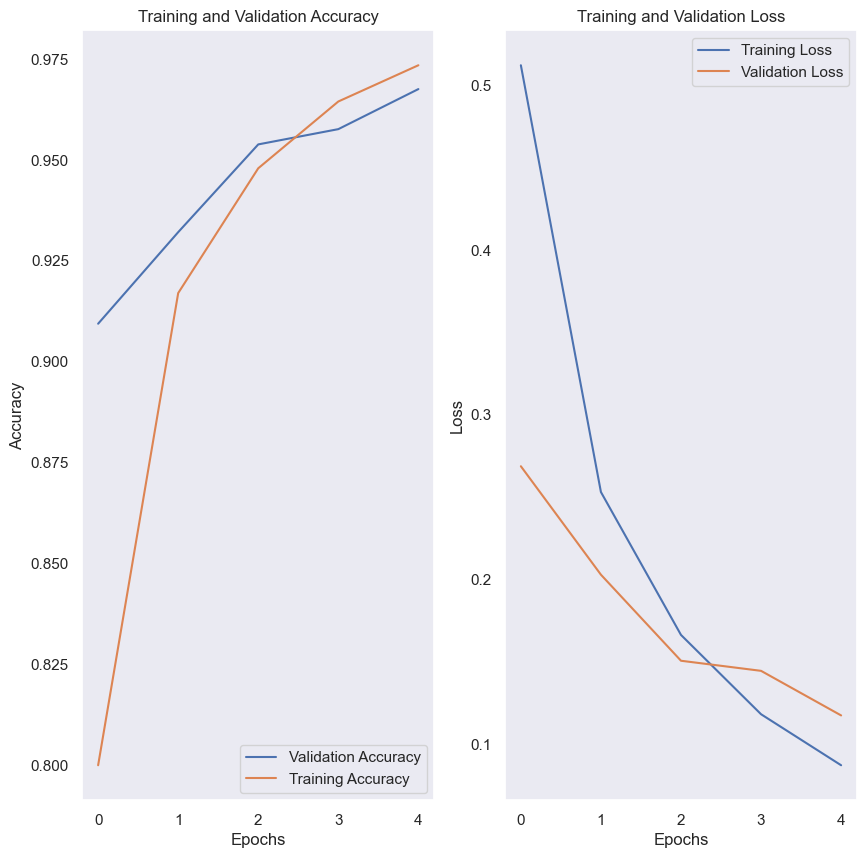

In [69]:
acc = history_2.history['categorical_accuracy'] # training accuracy
val_acc = history_2.history['val_categorical_accuracy'] # validation accuracy

loss = history_2.history['loss'] # training loss
val_loss = history_2.history['val_loss'] # validation loss

epochs_range = range(5)



plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()